In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

Logistic REgressionda yapilacaklar
1- veriye baktim ve inceledim, boxplotlar cizdirdim
2- Outlier varmi yok mu diye, ve get_dummies lazimsa yapilir,
3- veriyi train ve test diye böleriz
4- Scaling yapariz

In [34]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [37]:
df.Outcome.value_counts(normalize = True)

# buda bir üsttekinin oranlar olarak görülmesi

0   0.651
1   0.349
Name: Outcome, dtype: float64

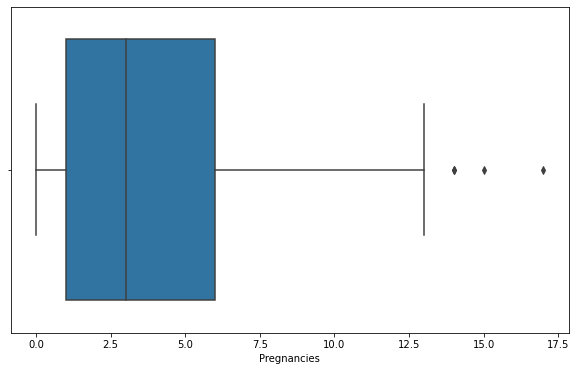

In [38]:
sns.boxplot(df.Pregnancies)
plt.show()

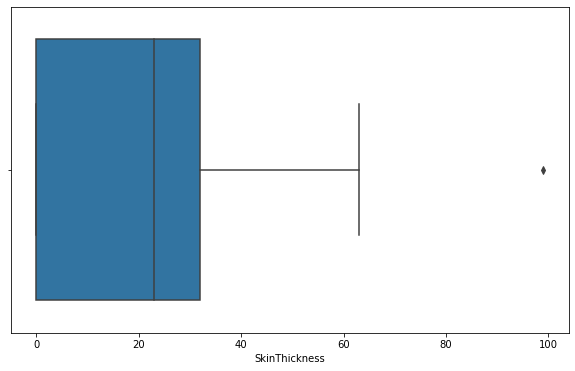

In [39]:
sns.boxplot(df.SkinThickness)
plt.show()

In [40]:
df=df[df.SkinThickness<70]   #burda o Outlier'i attik

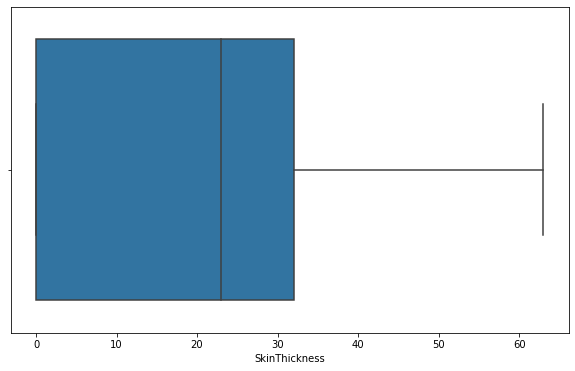

In [41]:
sns.boxplot(df.SkinThickness)
plt.show()

In [42]:
df=df[df.Glucose>0]   #soldaki Outlieri attik

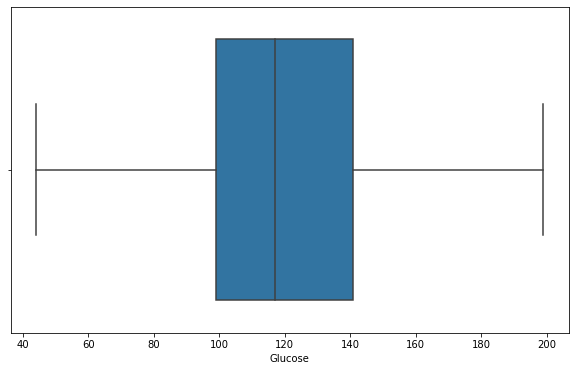

In [43]:
sns.boxplot(df.Glucose)
plt.show()

In [44]:
df=df[df.BloodPressure>35]

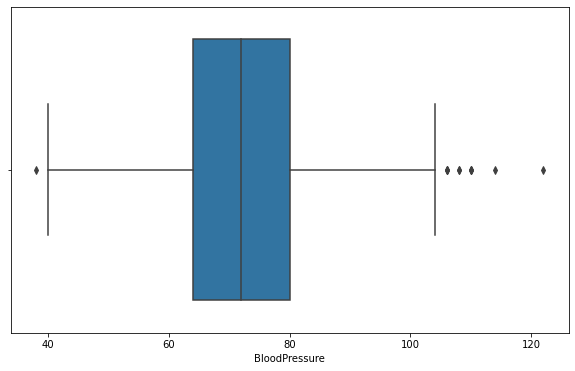

In [45]:
sns.boxplot(df.BloodPressure)
plt.show()

In [46]:
df=df[df.BMI>0]

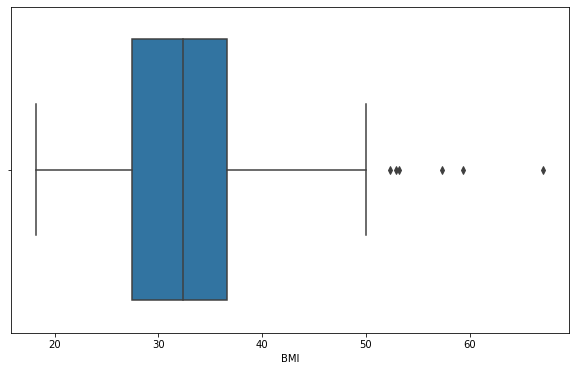

In [47]:
sns.boxplot(df.BMI)
plt.show()

In [48]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# stratify traine hem 1 hem sifirdan esit gitsin istiyorum, cogunluk sifir olmamasini istiyorum,
#cünkü unbalans dataydi verimiz, traine dengeli bir veri göndermeye yariyor
# unbalans ile mücadele ederken, birde trainin unbalans olmasina izin vermiyoruz

#Popülasyonu, tabaka (strata) adı verilen homojen alt gruplara bölerek ve ardından 
# her alt grup içinde Basit Rastgele Örnekleme uygulayarak Tabakalı Örnekleme gerçekleştiririz.

# Scaling

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #teste fit yapmiyoruz,

# Modeling

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_model=LogisticRegression()

In [55]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [56]:
y_pred=log_model.predict(X_test_scaled)
y_train_pred = log_model.predict(X_train_scaled)

In [61]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [64]:
y_pred_proba[0:5]

array([[0.23392748, 0.76607252],
       [0.11962655, 0.88037345],
       [0.5815906 , 0.4184094 ],
       [0.81462769, 0.18537231],
       [0.19171825, 0.80828175]])

In [68]:
test_data = pd.concat([X_test, y_test], axis=1) #Xtest ve Ytestleri birlestirdi,yani bölünmeden önceki gibi bir DataFrame oldu
test_data["pred"] = y_pred  #bunlarida sütun olarak ekliyor
test_data["pred_proba"] = y_pred_proba[:,1]  #1 olma olasılığı
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
275,2,100,70,52,57,40.500,0.677,25,0,0,0.285
702,1,168,88,29,0,35.000,0.905,52,1,1,0.753
673,3,123,100,35,240,57.300,0.880,22,0,1,0.766
433,2,139,75,0,0,25.600,0.167,29,0,0,0.198
46,1,146,56,0,0,29.700,0.564,29,0,0,0.428
741,3,102,44,20,94,30.800,0.400,26,0,0,0.160
257,2,114,68,22,0,28.700,0.092,25,0,0,0.119
446,1,100,72,12,70,25.300,0.658,28,0,0,0.070
567,6,92,62,32,126,32.000,0.085,46,0,0,0.129
226,0,101,76,0,0,35.700,0.198,26,0,0,0.110
